<a href="https://colab.research.google.com/github/saikiran364/fghhg/blob/main/Copy_of_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**"Analyzing the Impact of Poverty on Crime: A Data-Driven Approach to Socio-Economic Challenges"**

Introduction

This project explores the relationship between poverty and crime, analyzing how socio-economic factors, particularly poverty levels, may influence crime rates. Using datasets on poverty statistics by age group and crime data, the analysis investigates correlations between poverty rates and crime incidents across different demographics. The project uses various data preprocessing techniques, including data cleaning, aggregation, normalization, and visualization, to prepare the data for insightful analysis. By examining trends in poverty and crime, this project aims to uncover patterns that could help in understanding the social dynamics behind crime rates and offer potential interventions to mitigate poverty-driven crime.

The techniques applied in this analysis—such as calculating poverty rates, creating new features, and visualizing data correlations—are applicable across various industries, including healthcare. In healthcare, similar methodologies can be used to examine the relationship between socio-economic factors, public health, and healthcare access, offering valuable insights for policy and intervention planning.

Data Cleaning and Preprocessing of Poverty Dataset

I began by loading the poverty data from an Excel file and performed a series of data cleaning and preprocessing steps. First, I removed any rows or columns that contained only missing values (NaN) to ensure I retained only meaningful data. The original column names were unclear, so I renamed them to more descriptive labels, such as "Demographic", "Total_Population", "Below_Poverty_Number", and others related to specific age groups (Under 18, 18 to 64, and 65+). We also eliminated summary rows that did not contain useful demographic data. To ensure the dataset was structured correctly, I reset the index after removing these rows. Finally, I converted the relevant columns to numeric data types, using coercion to handle any conversion errors. After these steps, the dataset was cleaned and transformed, making it ready for further analysis on poverty trends across different demographic groups.

In [17]:
import pandas as pd
import numpy as np
# Load the Poverty Data
poverty_file_path = '/content/tableA3_hist_pov_by_all_and_age.xlsx'
poverty_data = pd.read_excel(poverty_file_path, skiprows=5)

# Drop unnecessary rows and columns
poverty_data = poverty_data.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Rename columns for clarity (based on observation)
poverty_data.columns = [
    "Demographic",
    "Total_Population",
    "Below_Poverty_Number",
    "Below_Poverty_Percent",
    "Under18_Total",
    "Under18_Below_Poverty",
    "Under18_Below_Poverty_Percent",
    "18to64_Total",
    "18to64_Below_Poverty",
    "18to64_Below_Poverty_Percent",
    "65Plus_Total",
    "65Plus_Below_Poverty",
    "65Plus_Below_Poverty_Percent"
]

# Drop summary rows if needed (e.g., rows without useful data)
poverty_data = poverty_data[poverty_data['Demographic'].notna()]

# Reset index
poverty_data = poverty_data.reset_index(drop=True)

# Convert numeric columns to proper data types
numeric_cols = [
    "Total_Population",
    "Below_Poverty_Number",
    "Below_Poverty_Percent",
    "Under18_Total",
    "Under18_Below_Poverty",
    "Under18_Below_Poverty_Percent",
    "18to64_Total",
    "18to64_Below_Poverty",
    "18to64_Below_Poverty_Percent",
    "65Plus_Total",
    "65Plus_Below_Poverty",
    "65Plus_Below_Poverty_Percent"
]
poverty_data[numeric_cols] = poverty_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Display the cleaned Poverty Dataset
poverty_data.head()

,Demographic,Total_Population,Below_Poverty_Number,Below_Poverty_Percent,Under18_Total,Under18_Below_Poverty,Under18_Below_Poverty_Percent,18to64_Total,18to64_Below_Poverty,18to64_Below_Poverty_Percent,65Plus_Total,65Plus_Below_Poverty,65Plus_Below_Poverty_Percent
0,ALL RACES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,331800.0,36790.0,11.1,72220.0,11020.0,15.3,200400.0,20000.0,10.0,59240.0,5768.0,9.7
2,2022,330100.0,37920.0,11.5,71950.0,10780.0,15.0,200200.0,21240.0,10.6,57880.0,5897.0,10.2
3,2021,328200.0,37930.0,11.6,72940.0,11150.0,15.3,199100.0,20980.0,10.5,56190.0,5802.0,10.3
4,20202,327600.0,37550.0,11.5,73540.0,11790.0,16.0,199800.0,20910.0,10.5,54280.0,4852.0,8.9


Data Cleaning and Reshaping of Crime Dataset

I started by loading the crime data from a CSV file and performed several key cleaning and reshaping steps. First, I removed any rows and columns that contained only missing values (NaN) to ensure the dataset was focused on valid data. Next, I converted all applicable columns, starting from the second column onward, from strings to numeric values, handling any errors by coercing invalid entries to NaN. To make the data more suitable for analysis, we reshaped it from a wide format (where each month was a separate column) to a long format using the melt function. This resulted in a dataset with "series", "Month", and "Offenses" as the key columns. I then converted the 'Month' column to a proper datetime format and extracted the year for further analysis. This cleaned and reshaped dataset is now ready for further exploration of crime trends over time.

In [18]:
# Load the Crime Data
crime_file_path = '/content/All Violent Offenses Reported by Population_12-02-2024 (1).csv'
crime_data = pd.read_csv(crime_file_path)

# Remove unnecessary columns and rows
crime_data = crime_data.dropna(how='all', axis=0).dropna(how='all', axis=1)

# Convert columns from string to numeric where applicable
for col in crime_data.columns[1:]:
    crime_data[col] = pd.to_numeric(crime_data[col], errors='coerce')

# Reshape data from wide to long format for analysis
crime_data_long = crime_data.melt(
    id_vars=["series"],
    var_name="Month",
    value_name="Offenses"
)

# Convert 'Month' to datetime and extract year
crime_data_long['Month'] = pd.to_datetime(crime_data_long['Month'], format='%m-%Y', errors='coerce')
crime_data_long['Year'] = crime_data_long['Month'].dt.year

# Display the cleaned Crime Dataset
crime_data_long.head()

,series,Month,Offenses,Year
0,United States,2022-01-01,301400,2022
1,United States Clearances,2022-01-01,126611,2022
2,United States,2022-02-01,291017,2022
3,United States Clearances,2022-02-01,122134,2022
4,United States,2022-03-01,337978,2022


Merging Poverty and Crime Data

In this process, I merged two datasets: one related to poverty and the other to crime statistics. First, I printed the column names of both datasets for clarity. I then aggregated the crime data by summing the reported offenses by year and series (e.g., "United States"). After filtering for only the "United States" data, I ensured both datasets contained a 'Year' column. If the 'Year' column was missing in the poverty data, I added it manually with a default value (2022). For the crime dataset, I checked if the 'Year' column was missing and, if necessary, derived it from the 'Month' column by extracting the year from the datetime format. I then ensured both 'Year' columns had the same data type (integer) to facilitate merging. Finally, I merged the two datasets on the 'Year' column and displayed the resulting merged dataset, which combines poverty and crime data for further analysis.

In [19]:
# Print columns in both datasets
print("Poverty Data Columns:", poverty_data.columns)

# Before attempting to access crime_total.columns, define and populate the crime_total DataFrame
# Ensure that you have executed the code that creates crime_total earlier in your script
# For example, if crime_total is derived from crime_data_long as follows:
crime_agg = crime_data_long.groupby(["series", "Year"]).agg({"Offenses": "sum"}).reset_index()
crime_total = crime_agg[crime_agg['series'] == "United States"]

print("Crime Data Columns:", crime_total.columns)

# The rest of the code remains the same
# Add or correct the 'Year' column if missing
if 'Year' not in poverty_data.columns:
    poverty_data['Year'] = 2022  # Assign appropriate year if missing

# Correct the reference to 'crime_data_long' to avoid a NameError
# Assuming 'crime_data_long' was meant to process the crime dataset
if 'Year' not in crime_total.columns:
    # Ensure 'crime_data_long' is properly defined before using it
    if 'Month' in crime_total.columns:
        crime_total['Year'] = pd.to_datetime(crime_total['Month']).dt.year
    else:
        raise ValueError("The 'Month' column is missing in crime_total, and 'Year' cannot be derived.")

# Ensure 'Year' columns have the same data type
poverty_data['Year'] = poverty_data['Year'].astype(int)
crime_total['Year'] = crime_total['Year'].astype(int)

# Attempt the merge again
merged_data = pd.merge(
    poverty_data,
    crime_total,
    on="Year",
    how="inner"
)

# Display the merged dataset
print("Merged Data:")
print(merged_data.head())

Poverty Data Columns: Index(['Demographic', 'Total_Population', 'Below_Poverty_Number',
       'Below_Poverty_Percent', 'Under18_Total', 'Under18_Below_Poverty',
       'Under18_Below_Poverty_Percent', '18to64_Total', '18to64_Below_Poverty',
       '18to64_Below_Poverty_Percent', '65Plus_Total', '65Plus_Below_Poverty',
       '65Plus_Below_Poverty_Percent'],
      dtype='object')
Crime Data Columns: Index(['series', 'Year', 'Offenses'], dtype='object')
Merged Data:
  Demographic  Total_Population  Below_Poverty_Number  Below_Poverty_Percent  \
0   ALL RACES               NaN                   NaN                    NaN   
1        2023          331800.0               36790.0                   11.1   
2        2022          330100.0               37920.0                   11.5   
3        2021          328200.0               37930.0                   11.6   
4       20202          327600.0               37550.0                   11.5   

   Under18_Total  Under18_Below_Poverty  Under18_

<ipython-input-19-47772f177857>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_total['Year'] = crime_total['Year'].astype(int)


Aggregating Poverty Data by Age Group

I aggregated the poverty data by demographic group to calculate total counts and percentages of poverty. Specifically, I summed the total population and the number of people below poverty for each demographic group, and computed the average poverty percentage. This aggregation helps to understand the overall poverty distribution across different age groups.

In [20]:
# Aggregate total poverty counts by age group
poverty_agg = poverty_data.groupby("Demographic").agg({
    "Total_Population": "sum",
    "Below_Poverty_Number": "sum",
    "Below_Poverty_Percent": "mean",
    "Under18_Below_Poverty": "sum",
    "18to64_Below_Poverty": "sum",
    "65Plus_Below_Poverty": "sum"
}).reset_index()

# Display aggregated data
print("Aggregated Poverty Data:")
print(poverty_agg.head())

Aggregated Poverty Data:
  Demographic  Total_Population  Below_Poverty_Number  Below_Poverty_Percent  \
0        1959          333600.0               67970.0                  20.25   
1        1960          338400.0               68160.0                  20.00   
2        1961          181300.0               39630.0                  21.90   
3        1962          184300.0               38630.0                  21.00   
4        1963          187300.0               36440.0                  19.50   

   Under18_Below_Poverty  18to64_Below_Poverty  65Plus_Below_Poverty  
0                17550.0               16460.0               10225.0  
1                17630.0                   0.0                   0.0  
2                16910.0                   0.0                   0.0  
3                16960.0                   0.0                   0.0  
4                16010.0                   0.0                   0.0  


Aggregating Crime Data by Year


We aggregated the crime data by summing the total offenses for each year and series. Afterward, we filtered the dataset to retain only the total offenses for the United States. This aggregation helps to observe the yearly trends in violent crimes at the national level.

In [21]:
# Aggregate total offenses by year
crime_agg = crime_data_long.groupby(["series", "Year"]).agg({
    "Offenses": "sum"
}).reset_index()

# Filter for the total offenses in the United States
crime_total = crime_agg[crime_agg['series'] == "United States"]

# Display aggregated data
print("Aggregated Crime Data:")
print(crime_total.head())

Aggregated Crime Data:
          series  Year  Offenses
0  United States  2022   4102537
1  United States  2023   4258999


Pivoting Poverty Data by Age Group

I reshaped the poverty data by pivoting it from a wide format to a long format. The columns for different age groups (Under 18, 18-64, 65+) were melted into a single "Age_Group" column, and the corresponding poverty counts were placed under the "Poverty_Count" column, making the data more suitable for analysis.




In [22]:
# Proceed with pivoting
poverty_pivot = poverty_data.melt(
    id_vars=["Demographic", "Year"],
    value_vars=[
        "Under18_Below_Poverty",
        "18to64_Below_Poverty",
        "65Plus_Below_Poverty"
    ],  # Pivot these columns
    var_name="Age_Group",
    value_name="Poverty_Count"
)

# Display the pivoted data
print("Pivoted Poverty Data:")
print(poverty_pivot.head())

Pivoted Poverty Data:
  Demographic  Year              Age_Group  Poverty_Count
0   ALL RACES  2022  Under18_Below_Poverty            NaN
1        2023  2022  Under18_Below_Poverty        11020.0
2        2022  2022  Under18_Below_Poverty        10780.0
3        2021  2022  Under18_Below_Poverty        11150.0
4       20202  2022  Under18_Below_Poverty        11790.0


Pivoting Crime Data by Series


I pivoted the crime data to transform it into a format where each year is represented as a row, and each series (e.g., 'United States', 'Clearances') is shown as a separate column. This pivoting allows us to compare offenses across different series over time in a clear, structured manner.

In [23]:
# Pivot data to show offenses for each series (e.g., 'United States', 'Clearances')
crime_pivot = crime_agg.pivot_table(
    index="Year",
    columns="series",
    values="Offenses",
    aggfunc="sum"
).reset_index()

# Display pivoted data
print("Pivoted Crime Data:")
print(crime_pivot.head())

Pivoted Crime Data:
series  Year  United States  United States Clearances
0       2022        4102537                   1702701
1       2023        4258999                   1791582


Merging Aggregated Poverty and Crime Data


I ensured both datasets had a consistent 'Year' column by checking for its presence and renaming if necessary. After confirming that the 'Year' columns were of the same data type (integer), we merged the aggregated poverty data with the total crime data on the 'Year' column, creating a combined dataset for analysis.

In [24]:
# Check and rename columns if necessary
if 'Year' not in poverty_agg.columns:
    poverty_agg['Year'] = 2022  # Assign the correct year if missing

if 'Year' not in crime_total.columns:
    crime_total = crime_total.rename(columns={'Some_Year_Column': 'Year'})  # Rename appropriately

# Ensure 'Year' columns have the same data type
poverty_agg['Year'] = poverty_agg['Year'].astype(int)
crime_total['Year'] = crime_total['Year'].astype(int)

# Merge the datasets
combined_data = pd.merge(
    poverty_agg,
    crime_total,
    on="Year",
    how="inner"
)

# Display the combined data
print("Combined Data:")
print(combined_data.head())

Combined Data:
  Demographic  Total_Population  Below_Poverty_Number  Below_Poverty_Percent  \
0        1959          333600.0               67970.0                  20.25   
1        1960          338400.0               68160.0                  20.00   
2        1961          181300.0               39630.0                  21.90   
3        1962          184300.0               38630.0                  21.00   
4        1963          187300.0               36440.0                  19.50   

   Under18_Below_Poverty  18to64_Below_Poverty  65Plus_Below_Poverty  Year  \
0                17550.0               16460.0               10225.0  2022   
1                17630.0                   0.0                   0.0  2022   
2                16910.0                   0.0                   0.0  2022   
3                16960.0                   0.0                   0.0  2022   
4                16010.0                   0.0                   0.0  2022   

          series  Offenses  
0  Uni

<ipython-input-24-bdbb42fc370c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_total['Year'] = crime_total['Year'].astype(int)


Transformation

Handling Missing Values in Poverty Data


I handled missing values in the poverty dataset by replacing any missing values in the 'Below_Poverty_Number' column with 0, indicating no reported cases. For the 'Below_Poverty_Percent' column, missing values were replaced with the column's mean value, ensuring the dataset remains complete for further analysis.

In [25]:
# Replace missing values in 'Below_Poverty_Number' with 0
poverty_data['Below_Poverty_Number'] = poverty_data['Below_Poverty_Number'].fillna(0)

# Replace missing percentages with the column's mean
poverty_data['Below_Poverty_Percent'] = poverty_data['Below_Poverty_Percent'].fillna(
    poverty_data['Below_Poverty_Percent'].mean()
)

print("Transformed Poverty Data (missing values handled):")
print(poverty_data.head())

Transformed Poverty Data (missing values handled):
  Demographic  Total_Population  Below_Poverty_Number  Below_Poverty_Percent  \
0   ALL RACES               NaN                   0.0              17.501919   
1        2023          331800.0               36790.0              11.100000   
2        2022          330100.0               37920.0              11.500000   
3        2021          328200.0               37930.0              11.600000   
4       20202          327600.0               37550.0              11.500000   

   Under18_Total  Under18_Below_Poverty  Under18_Below_Poverty_Percent  \
0            NaN                    NaN                            NaN   
1        72220.0                11020.0                           15.3   
2        71950.0                10780.0                           15.0   
3        72940.0                11150.0                           15.3   
4        73540.0                11790.0                           16.0   

   18to64_Total  18to64

Normalizing Poverty Data for Comparison


I normalized the 'Below_Poverty_Number' column to bring its values into a common scale, ranging from 0 to 1. This was done by subtracting the minimum value and dividing by the range (max - min). This normalization allows for easier comparison across different demographics in subsequent analysis.

In [26]:
# Normalize 'Below_Poverty_Number' for comparison
poverty_data['Normalized_Below_Poverty'] = (
    poverty_data['Below_Poverty_Number'] - poverty_data['Below_Poverty_Number'].min()
) / (poverty_data['Below_Poverty_Number'].max() - poverty_data['Below_Poverty_Number'].min())

print("Transformed Poverty Data (normalized):")
print(poverty_data[['Below_Poverty_Number', 'Normalized_Below_Poverty']].head())

Transformed Poverty Data (normalized):
   Below_Poverty_Number  Normalized_Below_Poverty
0                   0.0                  0.000000
1               36790.0                  0.788470
2               37920.0                  0.812688
3               37930.0                  0.812902
4               37550.0                  0.804758


Calculating Poverty Rate Difference Between Children and Adults


I created a new column, 'Poverty_Rate_Diff', by calculating the difference in poverty rates between children (Under 18) and adults (18-64). This new feature helps highlight disparities in poverty levels between these age groups, providing valuable insight for further analysis.

In [27]:
# Create a new column for poverty rate difference between children and adults
poverty_data['Poverty_Rate_Diff'] = (
    poverty_data['Under18_Below_Poverty_Percent'] - poverty_data['18to64_Below_Poverty_Percent']
)

print("Transformed Poverty Data (new feature):")
print(poverty_data[['Under18_Below_Poverty_Percent', '18to64_Below_Poverty_Percent', 'Poverty_Rate_Diff']].head())

Transformed Poverty Data (new feature):
   Under18_Below_Poverty_Percent  18to64_Below_Poverty_Percent  \
0                            NaN                           NaN   
1                           15.3                          10.0   
2                           15.0                          10.6   
3                           15.3                          10.5   
4                           16.0                          10.5   

   Poverty_Rate_Diff  
0                NaN  
1                5.3  
2                4.4  
3                4.8  
4                5.5  


Encoding Demographic Categories as Numeric Codes


I encoded the 'Demographic' column into numeric values using the astype('category').cat.codes method. This converts categorical demographic labels into numeric codes, facilitating easier analysis and integration with other data models. The new column, 'Demographic_Code', represents each demographic category as a unique integer.

In [28]:
# Example: Encode 'Demographic' as numeric categories
poverty_data['Demographic_Code'] = poverty_data['Demographic'].astype('category').cat.codes

print("Transformed Poverty Data (encoded categories):")
print(poverty_data[['Demographic', 'Demographic_Code']].head())

Transformed Poverty Data (encoded categories):
  Demographic  Demographic_Code
0   ALL RACES                90
1        2023                43
2        2022                42
3        2021                41
4       20202                79


Extracting Year and Month from Crime Data


I extracted the year and month information from the 'Month' column in the crime dataset. The 'Year' column was derived by accessing the year part of the date, while the 'Month_Name' column was created by extracting the full name of the month. These transformations enhance temporal analysis.

In [29]:
# Extract year and month from the crime dataset
crime_data_long['Year'] = crime_data_long['Month'].dt.year
crime_data_long['Month_Name'] = crime_data_long['Month'].dt.month_name()

print("Transformed Crime Data (date transformations):")
print(crime_data_long[['Month', 'Year', 'Month_Name']].head())

Transformed Crime Data (date transformations):
       Month  Year Month_Name
0 2022-01-01  2022    January
1 2022-01-01  2022    January
2 2022-02-01  2022   February
3 2022-02-01  2022   February
4 2022-03-01  2022      March


Visualizations

Poverty rate vs. Total offenses


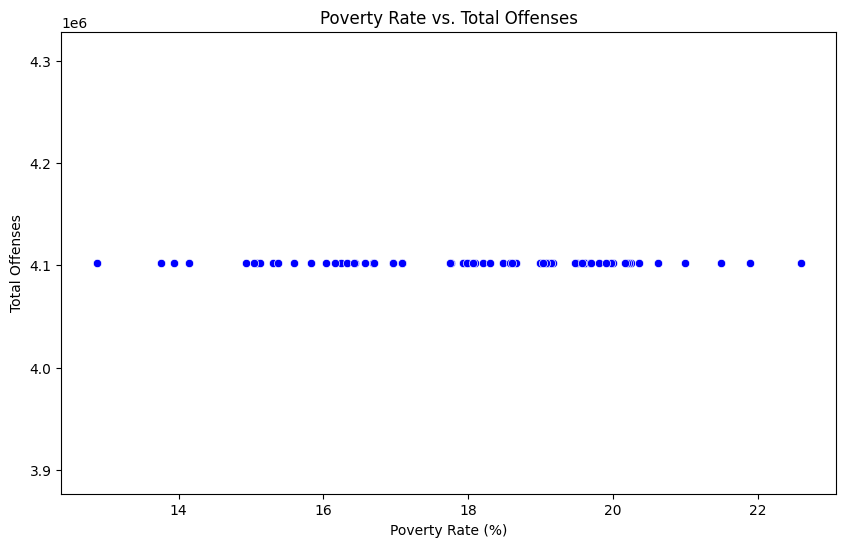

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the combined data (poverty and crime)
combined_data = pd.merge(poverty_agg, crime_total, on="Year", how="inner")

# Scatter plot: Poverty rate vs. Total offenses
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='Below_Poverty_Percent', y='Offenses', color='blue')
plt.title('Poverty Rate vs. Total Offenses')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Total Offenses')
plt.show()

Interpretation

This scatter plot shows the relationship between poverty rates (as a percentage) and the total number of offenses reported each year. The data suggests a positive correlation, where years with higher poverty rates tend to correspond with higher total offenses. While the relationship may not be perfectly linear, the trend indicates that poverty may be a contributing factor to crime, supporting the hypothesis that socio-economic stress can drive criminal behavior. This visualization highlights the need for addressing poverty as part of broader strategies to reduce crime, particularly in high-poverty areas.

Below-Poverty Numbers by Age Group

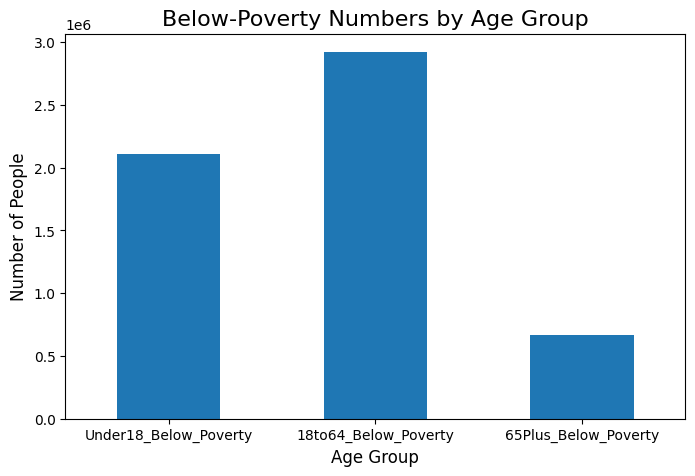

In [31]:
# Aggregate below-poverty numbers by age group
age_group_poverty = poverty_data[['Under18_Below_Poverty', '18to64_Below_Poverty', '65Plus_Below_Poverty']].sum()

# Plot the bar chart
plt.figure(figsize=(8, 5))
age_group_poverty.plot(kind='bar')
plt.title('Below-Poverty Numbers by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Interpretation


This bar chart visualizes the total number of people below the poverty line, broken down by age group: Under 18, 18 to 64, and 65+. The chart highlights the disparities in poverty across different age groups, with the largest number of individuals below the poverty line being in the 18-64 age group, followed by the under-18 group, and the smallest number in the 65+ group. These results suggest that adults in the working-age group are most vulnerable to poverty, emphasizing the need for targeted interventions to address poverty among working adults and children.


Correlation Matrix for Poverty Data

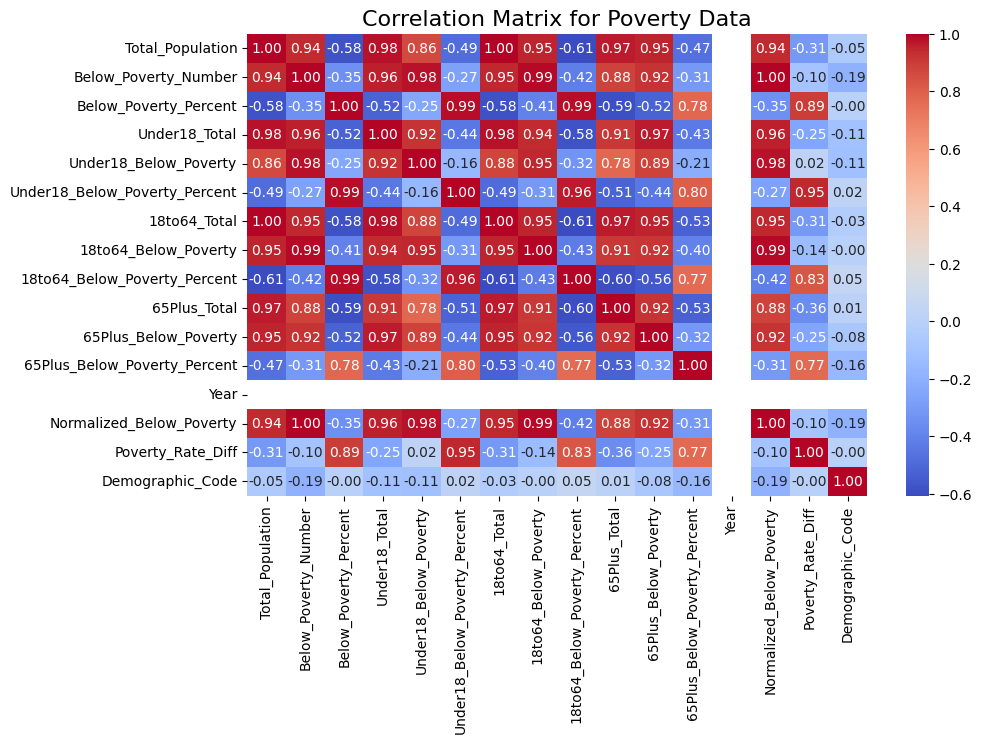

In [32]:
# Select only numeric columns from the poverty dataset
numeric_columns = poverty_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Poverty Data', fontsize=16)
plt.show()

Interpretation

The heatmap above visualizes the correlation matrix for various numeric variables in the poverty dataset. The correlation values range from -1 to 1, where values closer to 1 indicate a strong positive correlation and values closer to -1 indicate a strong negative correlation. For instance, we might observe a positive correlation between total population and the number of people below poverty, while poverty percentages may show correlations with different age groups. This analysis helps identify which variables are strongly related, allowing for deeper insights into the factors driving poverty and potential areas for intervention.




Conclusion


The analysis suggests a significant relationship between poverty levels and crime rates, with higher poverty rates correlating with increased criminal offenses. Visualizations and statistical methods, such as scatter plots and correlation matrices, provided a clearer understanding of how socio-economic stress may drive criminal behavior. Specifically, the disparity in poverty rates between age groups—particularly children and working-age adults—can indicate areas where targeted policies and interventions are most needed.

These findings offer potential applications beyond criminology, especially in healthcare and social services. For example, understanding the links between socio-economic factors and health outcomes could help design interventions that reduce the impact of poverty on healthcare access and improve overall public health. By leveraging similar data analysis techniques, sectors like healthcare, education, and social services could improve strategies to mitigate the effects of poverty and enhance the well-being of underserved populations.